In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [92]:
## train

pitcher_train = pd.read_csv("private_pitcher.csv")
batter_train = pd.read_csv("private_batter.csv")

In [93]:
## test

pitcher_test = pd.read_csv("private_pitcher_test.csv", index_col  = 0)
batter_test = pd.read_csv("private_batter_test.csv", index_col  = 0)

In [94]:
print(pitcher_train.shape)
print(batter_train.shape)

print(pitcher_test.shape)
print(batter_test.shape)

(27804, 22)
(81102, 14)
(168, 14)
(165, 11)


## 투수

In [95]:
pitcher_train.columns

Index(['GDAY_DS', 'T_ID', 'P_ID', 'TB_SC', 'INN2', 'BF', 'PA-AB', 'AB', 'HIT',
       'H1', 'H2', 'H3', 'HR', 'SB_SR', 'KK', 'WP', 'ER', 'ERA', 'SLG',
       'BABIP', 'KK9', 'BB9'],
      dtype='object')

In [96]:
pitcher_test.columns

Index(['T_ID', 'P_ID', 'TB_SC', 'INN2', 'PA-AB', 'H1', 'H2', 'H3', 'HR',
       'SB_SR', 'WP', 'BABIP', 'KK9', 'BB9'],
      dtype='object')

### Gameday, 'BF', 'AB', 'HIT', 'KK', 'ER', 'ERA', 'SLG' 빠짐

## 타자

In [97]:
batter_train.columns

Index(['GDAY_DS', 'T_ID', 'P_ID', 'TB_SC', 'PA-AB', 'AB', 'RUN', 'RBI', 'HIT',
       'SH+SF', 'KK', 'AVG', 'SB_trial', 'BABIP'],
      dtype='object')

In [98]:
batter_test.columns

Index(['T_ID', 'P_ID', 'TB_SC', 'PA-AB', 'AB', 'RUN', 'RBI', 'SH+SF', 'KK',
       'SB_trial', 'BABIP'],
      dtype='object')

### Gameday, 'HIT', 'AVG' 빠짐

In [99]:
batter_train.drop(columns = ['GDAY_DS','AVG'], inplace = True)
pitcher_train.drop(columns = ['GDAY_DS','ERA'], inplace = True)

In [100]:
pitcher_train.drop(columns = ['T_ID','P_ID'], inplace = True)
batter_train.drop(columns = ['T_ID','P_ID'], inplace = True)

pitcher_train.drop(columns = ['BF','AB'], inplace = True)
pitcher_train.drop(columns = ['HIT','KK'], inplace = True)
pitcher_train.drop(columns = ['SLG'], inplace = True)

pitcher_test.drop(columns = ['T_ID','P_ID'], inplace = True)
batter_test.drop(columns = ['T_ID','P_ID'], inplace = True)

In [101]:
print(pitcher_train.shape)
print(pitcher_test.shape)

print(batter_train.shape)
print(batter_test.shape)

(27804, 13)
(168, 12)
(81102, 10)
(165, 9)


# Model Train

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

### 투수

In [103]:
pitcher_train.dtypes

TB_SC     object
INN2       int64
PA-AB      int64
H1         int64
H2         int64
H3         int64
HR         int64
SB_SR    float64
WP         int64
ER         int64
BABIP    float64
KK9      float64
BB9      float64
dtype: object

In [104]:
cat_features = ['TB_SC']
pitcher_train[cat_features] = pitcher_train[cat_features].astype('category')

pitcher_train.dtypes

TB_SC    category
INN2        int64
PA-AB       int64
H1          int64
H2          int64
H3          int64
HR          int64
SB_SR     float64
WP          int64
ER          int64
BABIP     float64
KK9       float64
BB9       float64
dtype: object

In [105]:
pitcher_test[cat_features] = pitcher_test[cat_features].astype('category')

pitcher_test.dtypes

TB_SC    category
INN2      float64
PA-AB     float64
H1        float64
H2        float64
H3        float64
HR        float64
SB_SR     float64
WP        float64
BABIP     float64
KK9       float64
BB9       float64
dtype: object

In [106]:
X = pitcher_train.drop(columns = ['ER'])
y = pitcher_train['ER']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 2020)

print(X_train.shape)
print(X_val.shape)
print(X.shape)

(19462, 12)
(8342, 12)
(27804, 12)


In [107]:
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_val.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_val.columns]

In [108]:
# same code again (not needed but doesn't bite)
cat_features = ['TB_SC']
pitcher_train[cat_features] = pitcher_train[cat_features].astype('category')

pitcher_train.dtypes

TB_SC    category
INN2        int64
PA-AB       int64
H1          int64
H2          int64
H3          int64
HR          int64
SB_SR     float64
WP          int64
ER          int64
BABIP     float64
KK9       float64
BB9       float64
dtype: object

In [109]:
#sklearn 을 이용한 random forest는 dummy변수화 해줘야 함.
pitcher_train = pd.get_dummies(pitcher_train)
pitcher_train.head()

,INN2,PA-AB,H1,H2,H3,HR,SB_SR,WP,ER,BABIP,KK9,BB9,TB_SC_B,TB_SC_T
0,6,1,1,0,0,0,0.0,0,0,0.250000,13.50,4.50,1,0
1,5,2,2,0,0,0,0.0,0,0,0.400000,5.40,5.40,1,0
2,1,0,1,0,0,0,0.0,0,0,0.500000,0.00,0.00,1,0
3,18,3,7,2,0,0,0.0,0,4,0.428571,6.00,1.50,1,0
4,4,2,0,1,0,0,0.0,0,1,0.333333,6.75,6.75,0,1


In [110]:
pitcher_test = pd.get_dummies(pitcher_test)
pitcher_test.head()

,INN2,PA-AB,H1,H2,H3,HR,SB_SR,WP,BABIP,KK9,BB9,TB_SC_B,TB_SC_T
0,2.77,0.72,0.81,0.21,0.08,0.01,0.01,0.03,0.37,8.28,10.23,1,0
1,2.09,0.43,0.45,0.05,0.00,0.01,0.00,0.00,0.26,6.03,7.02,1,0
2,3.26,0.52,0.64,0.08,0.00,0.26,0.05,0.00,0.20,6.17,3.99,0,1
3,15.77,3.26,4.08,0.74,0.11,0.43,0.63,0.08,0.33,8.07,6.16,0,1
4,14.93,2.50,3.96,0.91,0.05,0.69,0.36,0.66,0.31,6.81,4.59,0,1


In [111]:
X = pitcher_train.drop(columns = ['ER'])
y = pitcher_train['ER']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 2020)

print(X_train.shape)
print(X_val.shape)

print(X.shape)

(19462, 13)
(8342, 13)
(27804, 13)


In [112]:
estimator = RandomForestRegressor(random_state=2020)

para_grids = {
            "n_estimators" : [100, 500, 1000],
            "max_depth" : [None, 10, 30, 50],
            "min_samples_split" : [2, 3, 5, 10],
            "min_samples_leaf" : [1, 3, 5, 10, 15],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

grid = GridSearchCV(estimator, para_grids, cv=3, n_jobs=-1, verbose=3, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
forest = grid.best_estimator_

reg_prediction=forest.predict(X_val)

print (grid.best_score_, grid.best_params_)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 51.1min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 66.8min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 89.1min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 117.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 158.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 194.3min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 250.2min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 279.7min finished


-0.6187175540662936 {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


In [113]:
mse = mean_squared_error(y_val, reg_prediction)

In [114]:
mse

0.6008945138670255

In [115]:
pitcher_predicted_rf = grid.predict(pitcher_test)
pitcher_predicted_rf

array([0.22618274, 0.04654054, 0.10081933, 1.84019694, 3.16675317,
       2.66573063, 1.18187287, 0.10528557, 2.23939914, 0.04619796,
       0.33723321, 0.0154405 , 0.03080321, 3.19782547, 1.45408674,
       0.10623486, 0.0154405 , 0.10081885, 0.10202099, 3.27293588,
       3.19933268, 0.11328965, 0.02534685, 1.85606709, 0.11033591,
       1.16806407, 1.84281333, 0.03034289, 4.34713808, 0.25193332,
       0.11089855, 0.16831265, 0.02865875, 0.18933136, 0.10898892,
       1.68203861, 0.10831152, 0.09538684, 0.47166744, 2.95217805,
       0.65136634, 1.82297034, 0.10157906, 2.59904038, 0.10948289,
       0.1960939 , 3.31304488, 0.11263635, 0.098445  , 0.57076021,
       0.47485785, 1.41607676, 3.31154445, 0.06240856, 1.45748695,
       0.22049703, 0.2378469 , 0.01529945, 1.88704241, 0.11147973,
       0.03467089, 2.14279314, 0.10946578, 0.04046285, 2.93495997,
       0.11433541, 0.10936593, 0.11165103, 1.48635552, 2.09907906,
       0.23246726, 0.1908776 , 0.09931778, 0.10977345, 0.02849

In [116]:
rf_feature_importance = grid.best_estimator_.feature_importances_
rf_feature_imp=pd.Series(rf_feature_importance,index=X_train.columns).sort_values(ascending=False)
rf_feature_imp

H1         0.448054
HR         0.225092
BABIP      0.098173
H2         0.082892
BB9        0.045259
PA-AB      0.031288
INN2       0.030438
KK9        0.019291
H3         0.010754
WP         0.003902
SB_SR      0.002811
TB_SC_T    0.001034
TB_SC_B    0.001012
dtype: float64

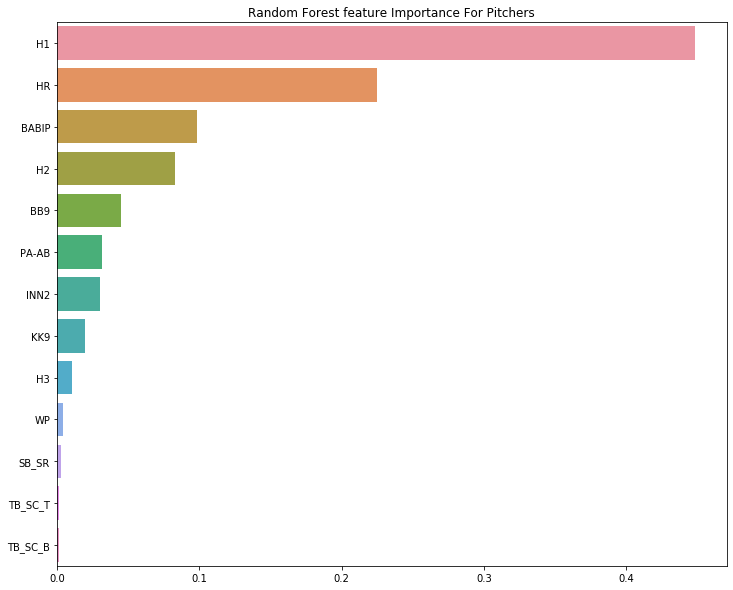

In [117]:
plt.figure(figsize=(12,10))
plt.title("Random Forest feature Importance For Pitchers")
sns.barplot(x=rf_feature_imp[0:30], y=rf_feature_imp.index[0:30])

In [118]:
pitcher_test.head()

,INN2,PA-AB,H1,H2,H3,HR,SB_SR,WP,BABIP,KK9,BB9,TB_SC_B,TB_SC_T
0,2.77,0.72,0.81,0.21,0.08,0.01,0.01,0.03,0.37,8.28,10.23,1,0
1,2.09,0.43,0.45,0.05,0.00,0.01,0.00,0.00,0.26,6.03,7.02,1,0
2,3.26,0.52,0.64,0.08,0.00,0.26,0.05,0.00,0.20,6.17,3.99,0,1
3,15.77,3.26,4.08,0.74,0.11,0.43,0.63,0.08,0.33,8.07,6.16,0,1
4,14.93,2.50,3.96,0.91,0.05,0.69,0.36,0.66,0.31,6.81,4.59,0,1


In [119]:
pitcher_test = pd.read_csv("private_pitcher_test.csv", index_col  = 0)
pitcher_test.head()

,T_ID,P_ID,TB_SC,INN2,PA-AB,H1,H2,H3,HR,SB_SR,WP,BABIP,KK9,BB9
0,OB,77263,B,2.77,0.72,0.81,0.21,0.08,0.01,0.01,0.03,0.37,8.28,10.23
1,NC,63959,B,2.09,0.43,0.45,0.05,0.00,0.01,0.00,0.00,0.26,6.03,7.02
2,NC,61295,T,3.26,0.52,0.64,0.08,0.00,0.26,0.05,0.00,0.20,6.17,3.99
3,SK,60841,T,15.77,3.26,4.08,0.74,0.11,0.43,0.63,0.08,0.33,8.07,6.16
4,LT,64021,T,14.93,2.50,3.96,0.91,0.05,0.69,0.36,0.66,0.31,6.81,4.59


In [120]:
pitcher_test['ER'] = np.round(pitcher_predicted_rf,2)

In [121]:
pitcher_test.head()

,T_ID,P_ID,TB_SC,INN2,PA-AB,H1,H2,H3,HR,SB_SR,WP,BABIP,KK9,BB9,ER
0,OB,77263,B,2.77,0.72,0.81,0.21,0.08,0.01,0.01,0.03,0.37,8.28,10.23,0.23
1,NC,63959,B,2.09,0.43,0.45,0.05,0.00,0.01,0.00,0.00,0.26,6.03,7.02,0.05
2,NC,61295,T,3.26,0.52,0.64,0.08,0.00,0.26,0.05,0.00,0.20,6.17,3.99,0.10
3,SK,60841,T,15.77,3.26,4.08,0.74,0.11,0.43,0.63,0.08,0.33,8.07,6.16,1.84
4,LT,64021,T,14.93,2.50,3.96,0.91,0.05,0.69,0.36,0.66,0.31,6.81,4.59,3.17


In [122]:
pitcher_test.to_csv("C:/Users/ishon/OneDrive/바탕 화면/big_con/big_contest_2020_summer/modeling_code/report_data/private_pitcher_report_rf.csv")

## 타자

In [123]:
batter_train.dtypes

TB_SC        object
PA-AB         int64
AB            int64
RUN           int64
RBI           int64
HIT           int64
SH+SF         int64
KK            int64
SB_trial      int64
BABIP       float64
dtype: object

In [124]:
cat_features = ['TB_SC']
batter_train[cat_features] = batter_train[cat_features].astype('category')

In [125]:
batter_train.dtypes

TB_SC       category
PA-AB          int64
AB             int64
RUN            int64
RBI            int64
HIT            int64
SH+SF          int64
KK             int64
SB_trial       int64
BABIP        float64
dtype: object

In [126]:
batter_test[cat_features] = batter_test[cat_features].astype('category')

batter_test.dtypes

TB_SC       category
PA-AB        float64
AB           float64
RUN          float64
RBI          float64
SH+SF        float64
KK           float64
SB_trial     float64
BABIP        float64
dtype: object

In [127]:
batter_train

,TB_SC,PA-AB,AB,RUN,RBI,HIT,SH+SF,KK,SB_trial,BABIP
0,T,0,1,0,0,1,0,0,0,1.000000
1,B,0,3,0,0,0,0,2,0,0.000000
2,B,0,4,2,2,3,0,1,1,1.000000
3,B,1,0,0,0,0,0,0,0,0.000000
4,T,0,2,1,0,1,0,0,0,0.500000
...,...,...,...,...,...,...,...,...,...,...
81097,B,0,4,0,0,1,0,1,0,0.333333
81098,B,1,3,0,1,3,0,0,0,1.000000
81099,B,1,0,0,0,0,0,0,0,0.000000
81100,T,0,5,0,0,0,0,0,0,0.000000


In [128]:
#sklearn 을 이용한 random forest는 dummy변수화 해줘야 함.
batter_train = pd.get_dummies(batter_train)
batter_train.head()

,PA-AB,AB,RUN,RBI,HIT,SH+SF,KK,SB_trial,BABIP,TB_SC_B,TB_SC_T
0,0,1,0,0,1,0,0,0,1.0,0,1
1,0,3,0,0,0,0,2,0,0.0,1,0
2,0,4,2,2,3,0,1,1,1.0,1,0
3,1,0,0,0,0,0,0,0,0.0,1,0
4,0,2,1,0,1,0,0,0,0.5,0,1


In [129]:
batter_test = pd.get_dummies(batter_test)
batter_test.head()

,PA-AB,AB,RUN,RBI,SH+SF,KK,SB_trial,BABIP,TB_SC_B,TB_SC_T
0,0.37,4.01,0.73,0.45,0.08,0.38,0.07,0.35,1,0
1,0.14,2.08,0.31,0.33,0.03,0.37,0.26,0.15,1,0
2,0.21,3.74,0.61,0.28,0.03,0.46,0.14,0.31,0,1
3,0.14,1.58,0.19,0.26,0.05,0.23,0.00,0.24,1,0
4,0.20,3.07,0.24,0.34,0.07,0.82,0.20,0.17,0,1


In [130]:
X = batter_train.drop(columns = ['HIT'])
y = batter_train['HIT']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 2020)

X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_val.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_val.columns]

In [131]:
estimator = RandomForestRegressor(random_state=2020)

para_grids = {
            "n_estimators" : [500, 1000],
            "max_depth" : [None, 10, 30, 50],
            "min_samples_split" : [2, 5, 10],
            "min_samples_leaf" : [1, 5, 10, 15],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

grid = GridSearchCV(estimator, para_grids, cv=3, n_jobs=-1, verbose=3, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
forest = grid.best_estimator_

reg_prediction=forest.predict(X_val)

print (grid.best_score_, grid.best_params_)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 64.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 97.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 150.1min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 209.9min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 233.3min finished


-0.005764702652110688 {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}


In [132]:
mse = mean_squared_error(y_val, reg_prediction)

In [133]:
mse

0.004000545476581492

In [134]:
batter_predicted_rf = grid.predict(batter_test)
batter_predicted_rf

array([1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   , 2.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.   ,
       1.   , 1.   , 1.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   ,
       0.   , 1.   , 1.   , 1.985, 1.   , 1.   , 2.   , 1.   , 1.   ,
       0.   , 1.   , 1.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   ,
       2.   , 2.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   ,
       1.   , 1.   , 1.   , 1.035, 1.   , 0.   , 1.   , 1.   , 1.   ,
       0.   , 1.   , 0.   , 1.   , 1.   , 2.   , 1.   , 1.   , 1.   ,
       0.   , 0.   , 1.   , 1.   , 1.   , 2.   , 0.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 0.   , 0.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   , 1.985,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.   ,
       0.   , 0.   ,

In [135]:
rf_feature_importance = grid.best_estimator_.feature_importances_
rf_feature_imp=pd.Series(rf_feature_importance,index=X_train.columns).sort_values(ascending=False)
rf_feature_imp

BABIP       0.762888
AB          0.107034
KK          0.072405
RBI         0.040462
RUN         0.013943
SH_SF       0.001415
PA_AB       0.001370
TB_SC_T     0.000163
TB_SC_B     0.000160
SB_trial    0.000160
dtype: float64

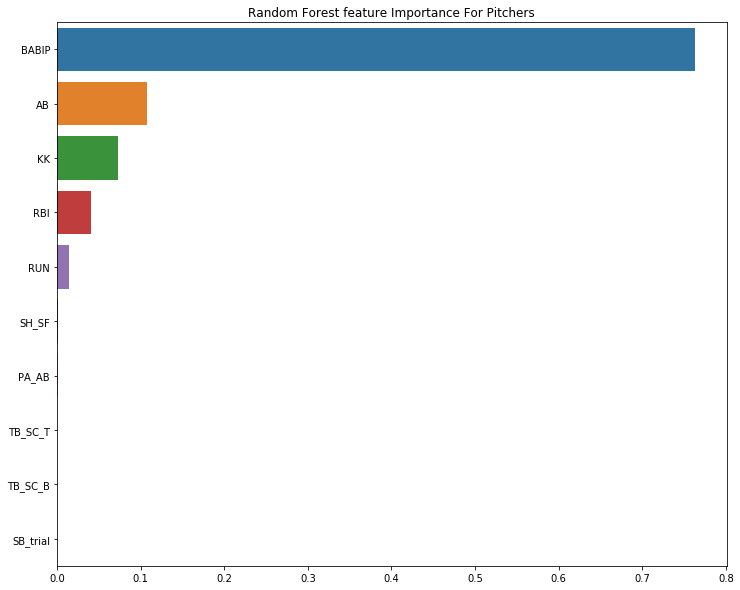

In [136]:
plt.figure(figsize=(12,10))
plt.title("Random Forest feature Importance For Pitchers")
sns.barplot(x=rf_feature_imp[0:30], y=rf_feature_imp.index[0:30])

In [137]:
batter_test.head()

,PA-AB,AB,RUN,RBI,SH+SF,KK,SB_trial,BABIP,TB_SC_B,TB_SC_T
0,0.37,4.01,0.73,0.45,0.08,0.38,0.07,0.35,1,0
1,0.14,2.08,0.31,0.33,0.03,0.37,0.26,0.15,1,0
2,0.21,3.74,0.61,0.28,0.03,0.46,0.14,0.31,0,1
3,0.14,1.58,0.19,0.26,0.05,0.23,0.00,0.24,1,0
4,0.20,3.07,0.24,0.34,0.07,0.82,0.20,0.17,0,1


In [138]:
batter_test = pd.read_csv("private_batter_test.csv", index_col  = 0)
batter_test.head()

,T_ID,P_ID,TB_SC,PA-AB,AB,RUN,RBI,SH+SF,KK,SB_trial,BABIP
0,NC,62907,B,0.37,4.01,0.73,0.45,0.08,0.38,0.07,0.35
1,NC,62934,B,0.14,2.08,0.31,0.33,0.03,0.37,0.26,0.15
2,HT,64646,T,0.21,3.74,0.61,0.28,0.03,0.46,0.14,0.31
3,NC,78122,B,0.14,1.58,0.19,0.26,0.05,0.23,0.00,0.24
4,KT,64006,T,0.20,3.07,0.24,0.34,0.07,0.82,0.20,0.17


In [139]:
batter_test['HIT'] = np.round(batter_predicted_rf,2)

In [140]:
batter_test.head()

,T_ID,P_ID,TB_SC,PA-AB,AB,RUN,RBI,SH+SF,KK,SB_trial,BABIP,HIT
0,NC,62907,B,0.37,4.01,0.73,0.45,0.08,0.38,0.07,0.35,1.0
1,NC,62934,B,0.14,2.08,0.31,0.33,0.03,0.37,0.26,0.15,1.0
2,HT,64646,T,0.21,3.74,0.61,0.28,0.03,0.46,0.14,0.31,1.0
3,NC,78122,B,0.14,1.58,0.19,0.26,0.05,0.23,0.00,0.24,1.0
4,KT,64006,T,0.20,3.07,0.24,0.34,0.07,0.82,0.20,0.17,1.0


In [141]:
batter_test.to_csv("C:/Users/ishon/OneDrive/바탕 화면/big_con/big_contest_2020_summer/modeling_code/report_data/private_batter_report_rf.csv")